# Road Accident Dataset – Data Analysis Overview 📊

This project explores the Road Accident dataset to uncover patterns in urban mobility. The dataset includes detailed records of Road Accident and casualities, road & Weather condition, and other affecting factors.

In this project, we analyze this dataset using Python libraries such as Pandas, NumPy, and Matplotlib/Seaborn.

**Objectives**:

- Explore dataset structure
- Perform cleaning and preprocessing
- Generate insights from data
- Visualize important trends

In [1]:
#importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the dataset
file= pd.read_csv("Road Accident Data.csv") 
file.head()

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,01-01-2021,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,Other,...,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,200901BS70006,01-01-2021,Thursday,Give way or uncontrolled,T or staggered junction,Slight,51.493415,Daylight,Kensington and Chelsea,Other,...,3,2,Metropolitan Police,Dry,Single carriageway,30,11:48,Urban,Fine no high winds,Car
2,200901CW10175,01-01-2021,Thursday,Auto traffic signal,Crossroads,Serious,51.523932,Darkness - lights lit,Westminster,Other,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:30,Urban,Fine no high winds,Motorcycle over 500cc
3,200901CW12278,01-01-2021,Thursday,Auto traffic signal,Crossroads,Slight,51.514015,Daylight,Westminster,Other,...,2,2,Metropolitan Police,Wet or damp,Single carriageway,30,09:01,Urban,Raining no high winds,Car
4,200901EK76923,01-01-2021,Thursday,Data missing or out of range,Not at junction or within 20 metres,Serious,51.543017,Daylight,Camden,Other,...,1,1,Metropolitan Police,Dry,Dual carriageway,30,05:29,Urban,Fine no high winds,Car


## **2. Explore the dataset**

We have to check dataset dimensions, columns, data types, and summary statistics.
- Using `file.info()` to know the
    - dimensions of the dataset,
    - column names,
    - data types of the columns,
    - count of non null values

In [3]:
file.info() #checking the file info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Accident_Index              307973 non-null  object 
 1   Accident Date               307973 non-null  object 
 2   Day_of_Week                 307973 non-null  object 
 3   Junction_Control            307973 non-null  object 
 4   Junction_Detail             307973 non-null  object 
 5   Accident_Severity           307973 non-null  object 
 6   Latitude                    307973 non-null  float64
 7   Light_Conditions            307973 non-null  object 
 8   Local_Authority_(District)  307973 non-null  object 
 9   Carriageway_Hazards         307973 non-null  object 
 10  Longitude                   307973 non-null  float64
 11  Number_of_Casualties        307973 non-null  int64  
 12  Number_of_Vehicles          307973 non-null  int64  
 13  Police_Force  

## **3. Data Cleaning**

For data cleaning purposes, we used different techniques based on our scenario which are
explained in-depth as follows:

1. Checking the Null values
2. Check for duplicates
3. Standardize the Data

### 1. Checking the Null Values

In [4]:
file.isnull().sum()

Accident_Index                 0
Accident Date                  0
Day_of_Week                    0
Junction_Control               0
Junction_Detail                0
Accident_Severity              0
Latitude                       0
Light_Conditions               0
Local_Authority_(District)     0
Carriageway_Hazards            0
Longitude                      0
Number_of_Casualties           0
Number_of_Vehicles             0
Police_Force                   0
Road_Surface_Conditions        0
Road_Type                      0
Speed_limit                    0
Time                          17
Urban_or_Rural_Area            0
Weather_Conditions             0
Vehicle_Type                   0
dtype: int64

- Found 17 null values in Time Column. So lets drop those rows

In [5]:
file.dropna(inplace = True) #dropping the null values

### 2. Check for duplicates

In [6]:
#checking for duplicates
print(file.duplicated().sum())
print(file.duplicated('Accident_Index').sum())

1
110312


- We have to notice that around 1 lakh of duplicates were found in 'Accident_Index' column, so it is not a unique feature.

In [7]:
#removing duplicates
file.drop_duplicates(inplace = True) 

### 3. Standardize the Data

- Here we can see that many of the data columns are in in-appropriate data type. So convert into proper type

In [8]:
# Combine date and time into a single string
file['AccidentDateTime'] = file['Accident Date'] + " " + file['Time']

# Convert to datetime format
file['AccidentDateTime'] = pd.to_datetime(file['AccidentDateTime'],format='mixed',dayfirst = True )

#Extracted Month Name and added a new column
file['Month'] = file['AccidentDateTime'].dt.month_name()

file['AccidentHour'] = file['AccidentDateTime'].dt.hour

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
file['Month'] = pd.Categorical(file['Month'], categories=month_order, ordered=True)

#Arranging the Days of week in order
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
               'Saturday']
file['Day_of_Week'] = pd.Categorical(file['Day_of_Week'], categories=day_order, ordered=True)


#droping unwanted columns
file.drop(["Latitude","Longitude"],axis = 1,inplace = True)

file

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,Number_of_Casualties,...,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,AccidentDateTime,Month,AccidentHour
0,200901BS70001,01-01-2021,Thursday,Give way or uncontrolled,T or staggered junction,Serious,Daylight,Kensington and Chelsea,Other,1,...,Dry,One way street,30,15:11,Urban,Fine no high winds,Car,2021-01-01 15:11:00,January,15
1,200901BS70006,01-01-2021,Thursday,Give way or uncontrolled,T or staggered junction,Slight,Daylight,Kensington and Chelsea,Other,3,...,Dry,Single carriageway,30,11:48,Urban,Fine no high winds,Car,2021-01-01 11:48:00,January,11
2,200901CW10175,01-01-2021,Thursday,Auto traffic signal,Crossroads,Serious,Darkness - lights lit,Westminster,Other,1,...,Dry,Single carriageway,30,17:30,Urban,Fine no high winds,Motorcycle over 500cc,2021-01-01 17:30:00,January,17
3,200901CW12278,01-01-2021,Thursday,Auto traffic signal,Crossroads,Slight,Daylight,Westminster,Other,2,...,Wet or damp,Single carriageway,30,09:01,Urban,Raining no high winds,Car,2021-01-01 09:01:00,January,9
4,200901EK76923,01-01-2021,Thursday,Data missing or out of range,Not at junction or within 20 metres,Serious,Daylight,Camden,Other,1,...,Dry,Dual carriageway,30,05:29,Urban,Fine no high winds,Car,2021-01-01 05:29:00,January,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307968,2010550D56893,31-12-2022,Friday,Give way or uncontrolled,T or staggered junction,Slight,Darkness - lights lit,North Dorset,Other,1,...,Dry,Single carriageway,30,20:40,Rural,Fine no high winds,Car,2022-12-31 20:40:00,December,20
307969,201060L239013,31-12-2022,Friday,Auto traffic signal,T or staggered junction,Slight,Darkness - lights lit,Wrexham,Other,4,...,Wet or damp,Dual carriageway,30,18:25,Urban,Fine no high winds,Car,2022-12-31 18:25:00,December,18
307970,2.01E+12,31-12-2022,Friday,Give way or uncontrolled,Roundabout,Slight,Daylight,Newport,Other,1,...,Dry,Roundabout,50,13:51,Urban,Fine no high winds,Car,2022-12-31 13:51:00,December,13
307971,2.01E+12,31-12-2022,Friday,Give way or uncontrolled,Other junction,Slight,Daylight,"Rhondda, Cynon, Taff",Other,1,...,Dry,Single carriageway,30,10:00,Urban,Fine no high winds,Car,2022-12-31 10:00:00,December,10


## **3. Exploratory Data Analysis**

1. Summary Statistics
2. Analysis Visualizations
3. Providing Insights

### 1. Statistical Description

In [9]:
file.describe()

,Number_of_Casualties,Number_of_Vehicles,Speed_limit,AccidentDateTime,AccidentHour
count,307955.00000,307955.000000,307955.000000,307955,307955.000000
mean,1.35689,1.829069,38.865678,2021-12-24 12:40:02.869899776,13.561715
min,1.00000,1.000000,10.000000,2021-01-01 00:01:00,0.000000
25%,1.00000,1.000000,30.000000,2021-06-28 22:13:30,10.000000
50%,1.00000,2.000000,30.000000,2021-12-08 15:41:00,14.000000
75%,1.00000,2.000000,50.000000,2022-06-25 12:55:00,17.000000
max,48.00000,32.000000,70.000000,2022-12-31 23:30:00,23.000000
std,0.81587,0.710466,14.032773,NaN,5.132658


In [10]:
#checking outliers through graph
def outlier_graph(cols):
    plt.figure(figsize=(15,8))
    for i in range(1,len(cols)+1):
        col = cols[i-1]
        plt.subplot(2,2,i)
        plt.title(f'{col}')
        sns.histplot(file[col])
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(15,8))
    for i in range(1,len(cols)+1):
        col = cols[i-1]
        plt.subplot(2,2,i)
        plt.title(f'{col}')
        sns.boxplot(file[col],orient='h')
    plt.tight_layout()    
    plt.show()

#By using the User Defined Function below, we can find and drop the outliers easily
outlier_df_dict = {}

def outlier_handle(i):
    global outlier_df_dict

    #finding the first quartile
    Q1 = file[i].quantile(0.25) 
    #finding the thirt quartile
    Q3 = file[i].quantile(0.75) 
    print(f"Q1 = {Q1} ,Q3 = {Q3}")

    #finding inter quartile range(IQR)
    IQR = Q3 - Q1 
    print("IQR = ",IQR)

    #finding the lower bound
    LB = Q1 - (1.5 * IQR) 
    #finding the lower bound
    UB = Q3 + (1.5 * IQR) 
    print(f"LB = {LB} ,UB = {UB}")

    #checking for outliers in df
    outliers_df = file[(file[i] < LB) | (file[i] > UB)] 

    

    #getting teh index for outliers
    outliers_index = outliers_df.index 

    print(f"""
    No. of. Outliers: {len(outliers_index)}
    Availabe no. of. records: {len(file.index)}
    After removing, Availabe no. of. records: {(len(file[i].index) - len(outliers_index))}
    """)

    #asking to remove outlier
    YorN = input("Continue to Remove Outliers?(Y/N): ")
    if YorN.upper() == 'Y':
        #saving the outlier df in a dictionary
        outlier_df_dict[f"df_{i}"] = outliers_df 
        
        #removing teh outliers
        file.drop(outliers_index, inplace=True)

        print(f"""
        No. of. Outliers Removed: {len(outliers_index)}
        Availabe no. of. records: {len(file.index)}
        """) 

        
        plt.title(f'{i}')
        sns.boxplot(file[i],orient='h')
        plt.tight_layout()    
        plt.show()
            
    elif YorN.upper() == 'N':
        print("No outliers removed")
        print(f"""
        Availabe no. of. records: {len(file.index)}
        """)
    else:
        print("Invalid input")
    
    

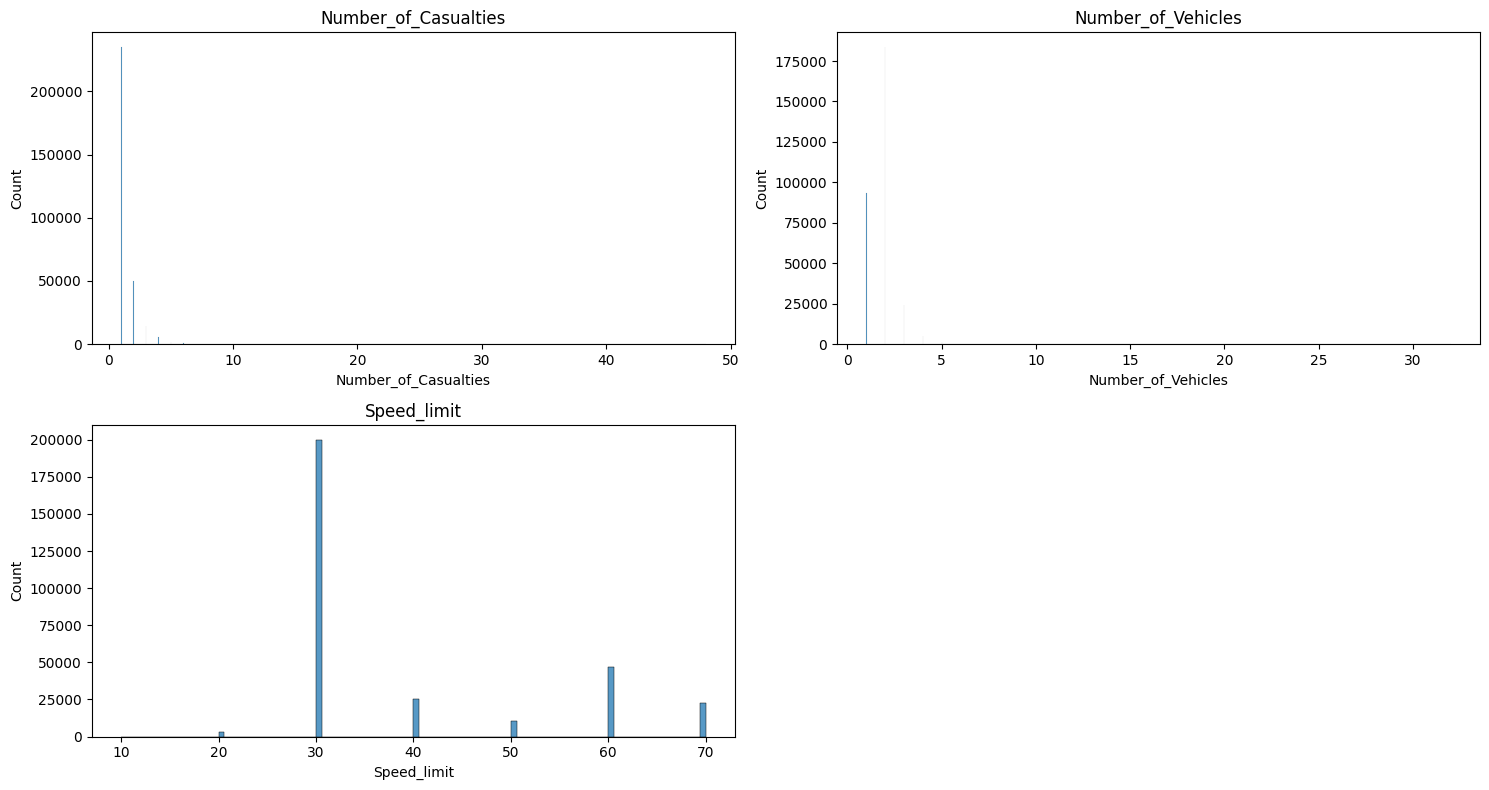

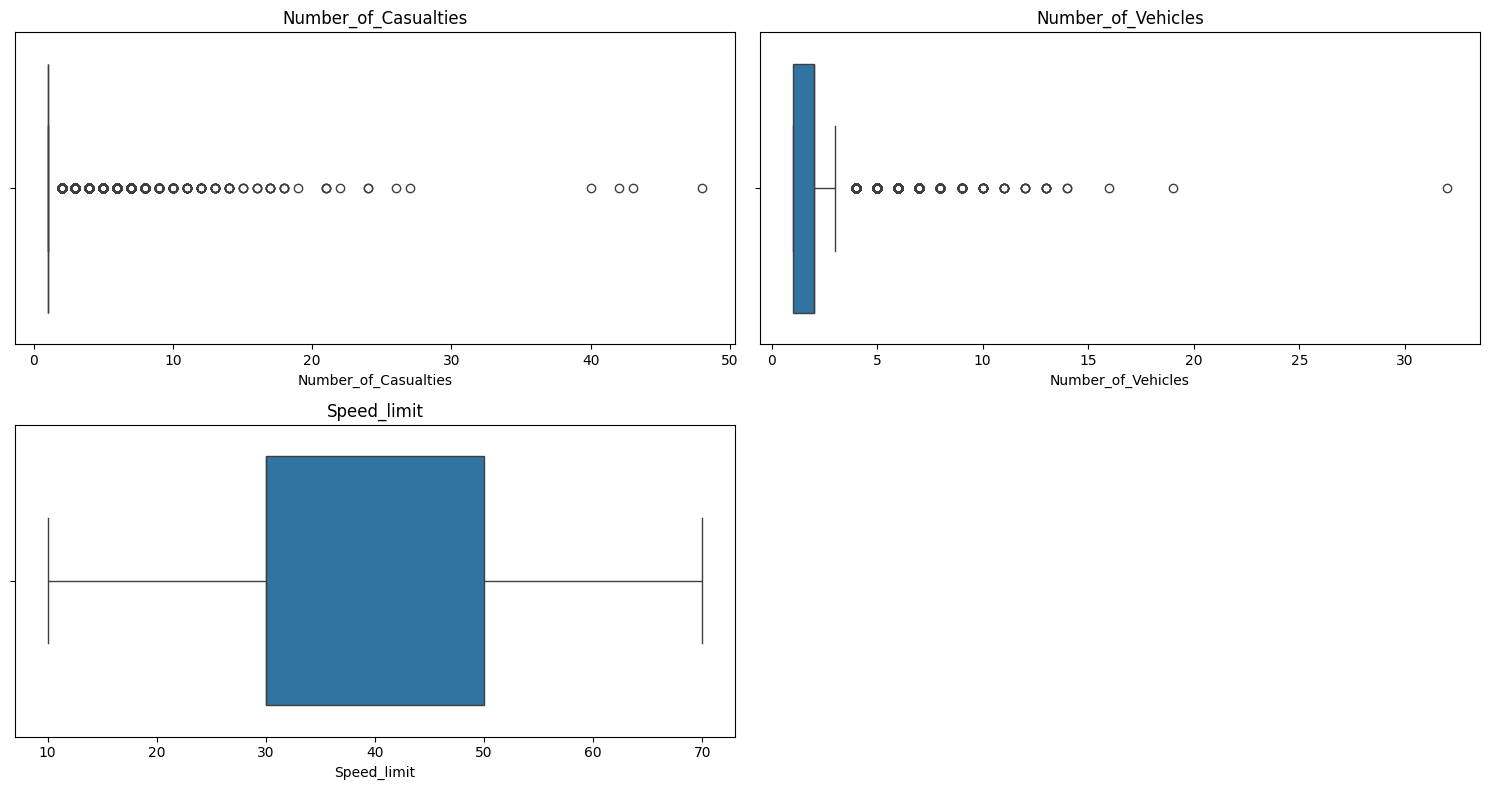

In [11]:
#checking outliers through graph
columns = ['Number_of_Casualties'	,'Number_of_Vehicles'	,'Speed_limit']
outlier_graph(columns)

- We can see some outliers in Number of Casualities, Number of Vehicles Column, so lets clear it for 1 time using Number of Casualities column

In [12]:
outlier_handle('Number_of_Casualties')

Q1 = 1.0 ,Q3 = 1.0
IQR =  0.0
LB = 1.0 ,UB = 1.0

    No. of. Outliers: 72877
    Availabe no. of. records: 307955
    After removing, Availabe no. of. records: 235078
    


Continue to Remove Outliers?(Y/N):  n


No outliers removed

        Availabe no. of. records: 307955
        


Q1 = 1.0 ,Q3 = 2.0
IQR =  1.0
LB = -0.5 ,UB = 3.5

    No. of. Outliers: 6802
    Availabe no. of. records: 307955
    After removing, Availabe no. of. records: 301153
    


Continue to Remove Outliers?(Y/N):  y



        No. of. Outliers Removed: 6802
        Availabe no. of. records: 301153
        


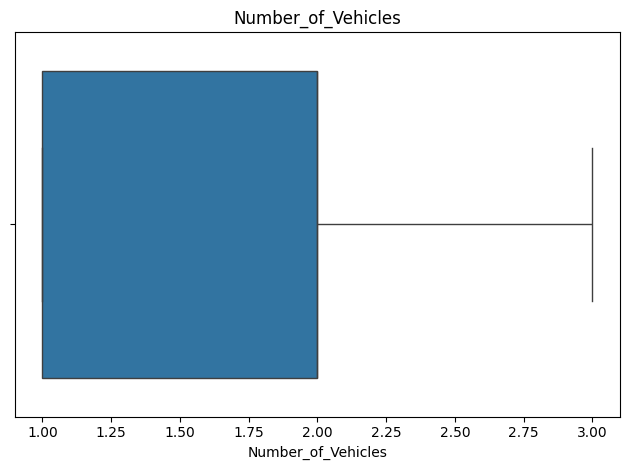

In [13]:
outlier_handle('Number_of_Vehicles')

### 2. Analysis 

1. Which months show the highest number of accidents?
2. Which day of week show the highest number of accidents?
3. Are accidents more frequent during specific hours of the day?
4. Do weekends vs weekdays show different accident severity trends?
5. Which type of Junction Details have many accidents?
6. What is Casualities count based on Accident_Severity?
7. What is the Rate of Casualities count with Light_Conditions?
8. What is the relationship between Road_Surface_Conditions and Casualities count?
9. Does the speed limit affect the casualities counts?
10. Which Vehicle_Type has high accidents counts?

In [14]:
#1. Which months show the highest number of accidents?
casuality_month = file.groupby(['Month'],observed=True)['Number_of_Casualties'].size()
casuality_month

Month
January      22882
February     21381
March        24962
April        23666
May          25621
June         26182
July         26451
August       24941
September    26146
October      27740
November     28388
December     22793
Name: Number_of_Casualties, dtype: int64

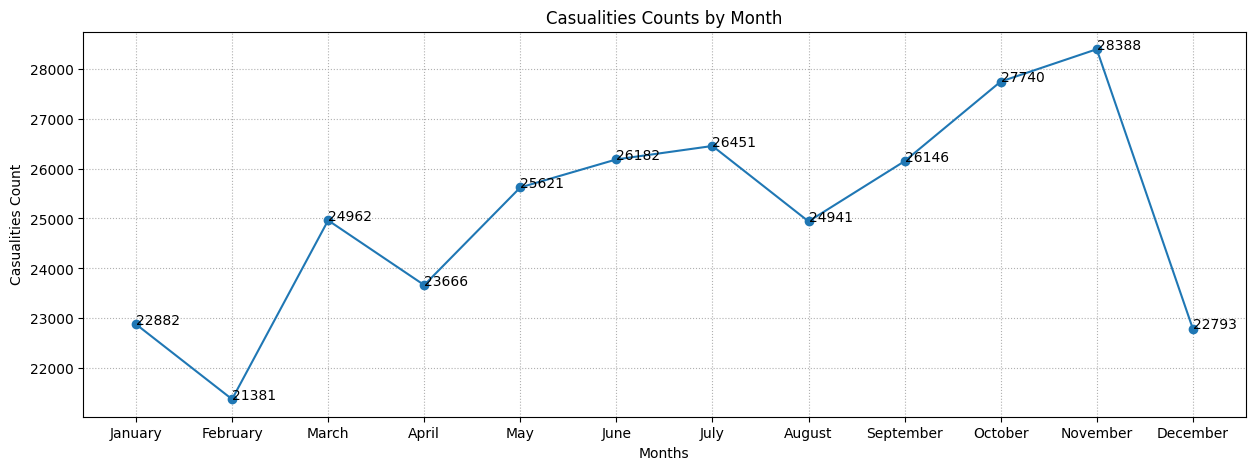

In [15]:
plt.figure(figsize=(15,5))
plt.title("Casualities Counts by Month")
plt.plot(casuality_month.index,casuality_month.values, marker='o')
plt.xlabel("Months")
plt.ylabel("Casualities Count")
plt.grid(linestyle=":")
for x,y in zip(casuality_month.index,casuality_month.values):
    plt.annotate(y,xy=(x,y),xytext=(x,y))
plt.show()


- The most accidenys was happened on November(29094)
- Least accident was occured in February(21882)

In [16]:
#2. Which day of week show the highest number of accidents?
casuality_Day = file.groupby(['Day_of_Week'],observed=True)['Number_of_Casualties'].size()
casuality_Day

Day_of_Week
Sunday       32812
Monday       42933
Tuesday      45398
Wednesday    45341
Thursday     44642
Friday       49360
Saturday     40667
Name: Number_of_Casualties, dtype: int64

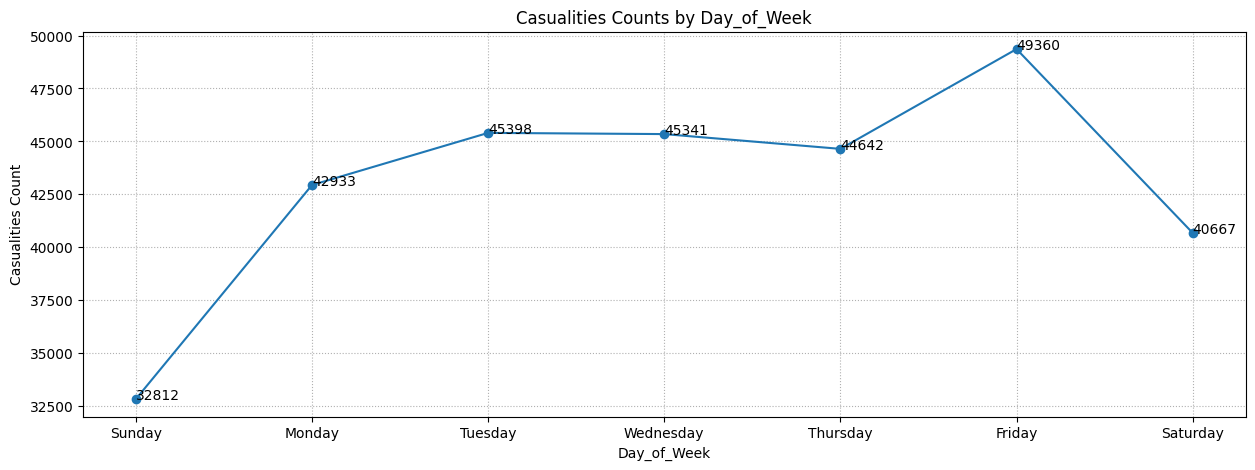

In [17]:
plt.figure(figsize=(15,5))
plt.title("Casualities Counts by Day_of_Week")
plt.plot(casuality_Day.index,casuality_Day.values, marker='o')
plt.xlabel("Day_of_Week")
plt.ylabel("Casualities Count")
plt.grid(linestyle=":")
for x,y in zip(casuality_Day.index,casuality_Day.values):
    plt.annotate(y,xy=(x,y),xytext=(x,y))
plt.show()


- The most accidenys was happened on Friday(50529)
- Least accident was occured in Sunday(33543)

In [18]:
#3. Are accidents more frequent during specific hours of the day?
casuality_hour = file.groupby(['AccidentHour'],observed=True)['Number_of_Casualties'].size()
casuality_hour

AccidentHour
0      4582
1      3462
2      2607
3      2261
4      1670
5      2428
6      5118
7     12253
8     21994
9     15243
10    13494
11    15776
12    17898
13    18456
14    18669
15    23681
16    24282
17    26246
18    20649
19    15575
20    11235
21     9297
22     7986
23     6291
Name: Number_of_Casualties, dtype: int64

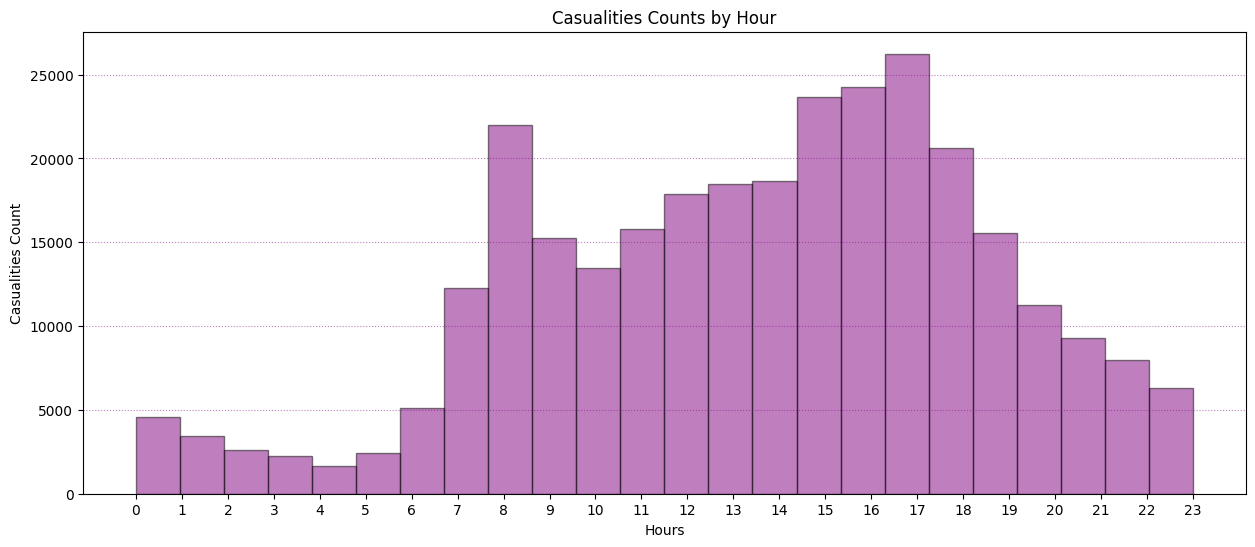

In [19]:
plt.figure(figsize=(15,6))
plt.title("Casualities Counts by Hour")
plt.hist(file['AccidentHour'], bins=24, color='purple', edgecolor='black', alpha=0.5)
plt.xticks(list(x for x in range(0,24)))
plt.xlabel("Hours")
plt.ylabel("Casualities Count")
plt.grid(axis='y',color='purple',linestyle=":",alpha=0.5)
plt.show()


In [20]:
#4. Do weekends vs weekdays show different accident severity trends?
casuality_Day = file.groupby(['Day_of_Week'],observed=True)['Number_of_Casualties'].sum()
casuality_Day

Day_of_Week
Sunday       47212
Monday       56362
Tuesday      59218
Wednesday    59158
Thursday     58433
Friday       65747
Saturday     57057
Name: Number_of_Casualties, dtype: int64

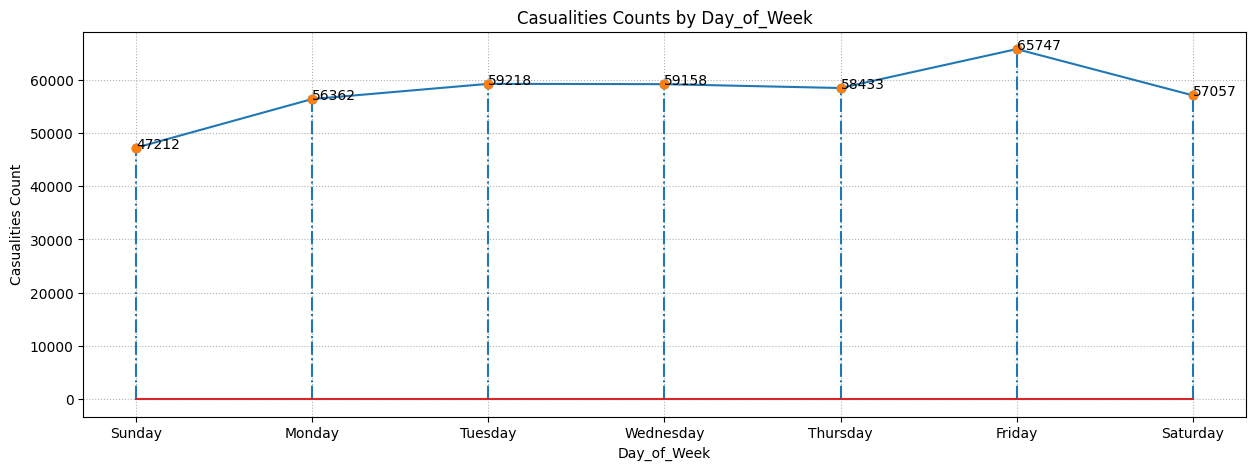

In [21]:
plt.figure(figsize=(15,5))
plt.title("Casualities Counts by Day_of_Week")
plt.plot(casuality_Day.index,casuality_Day.values, marker='o')
plt.stem(casuality_Day.index,casuality_Day.values,linefmt='-.', markerfmt='o')
plt.xlabel("Day_of_Week")
plt.ylabel("Casualities Count")
plt.grid(linestyle=":")
for x,y in zip(casuality_Day.index,casuality_Day.values):
    plt.annotate(y,xy=(x,y),xytext=(x,y))
plt.show()


- Comparitively, Week days have higher count of casualities
- Major accident count in the range of 50000 to 60000

In [22]:
#5. Which type of Junction control have many accidents?
Junction_Detail_Accidents = file.groupby(['Junction_Detail'])['Number_of_Casualties'].size()
Junction_Detail_Accidents

Junction_Detail
Crossroads                              29591
Mini-roundabout                          3317
More than 4 arms (not roundabout)        4085
Not at junction or within 20 metres    118924
Other junction                           8132
Private drive or entrance               10655
Roundabout                              27027
Slip road                                4045
T or staggered junction                 95377
Name: Number_of_Casualties, dtype: int64

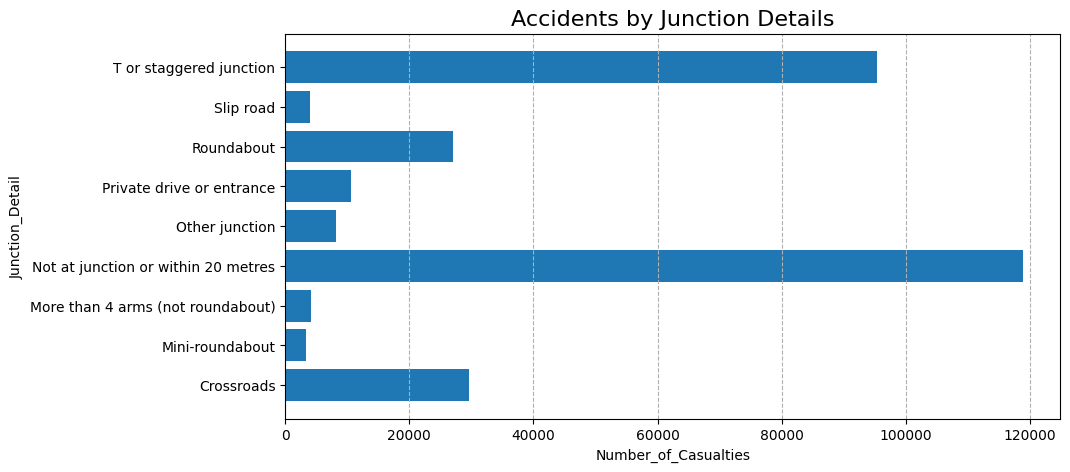

In [23]:
plt.figure(figsize=(10,5))
plt.barh(Junction_Detail_Accidents.index, Junction_Detail_Accidents.values)
plt.title('Accidents by Junction Details', fontsize=16)
plt.ylabel('Junction_Detail')
plt.xlabel('Number_of_Casualties')
plt.grid(axis='x', linestyle='--')
plt.show()

- Most of the accidents was occurred in "Not a junction or within 20 meters(11892)" and "T or staggered junction(95377)"
- Least of the accidents was occurred in "Mini-roundabout(3317)" and "More than 4 arms (not roundabout)(4085)"

In [24]:
#6. What is Casualities rate based on Accident_Severity?
Casualties_Accident_Severity = file.groupby(['Accident_Severity'])['Number_of_Casualties'].sum()
Casualties_Accident_Severity

Accident_Severity
Fatal        6709
Serious     56997
Slight     339481
Name: Number_of_Casualties, dtype: int64

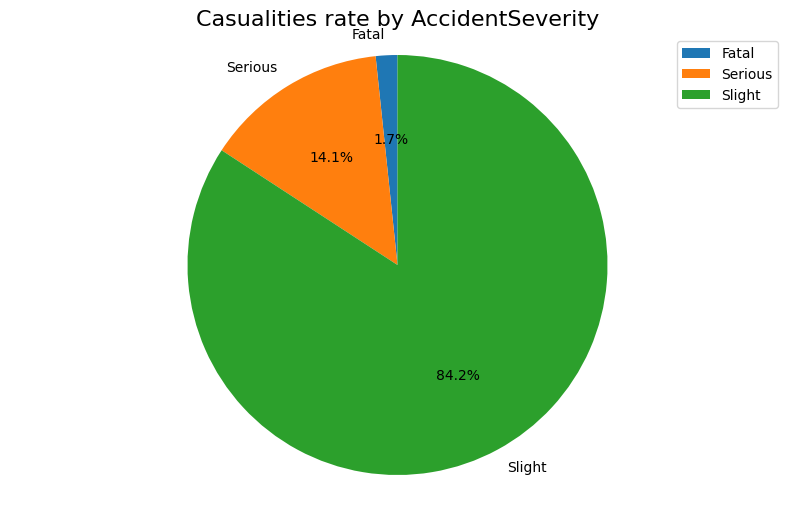

In [25]:
plt.figure(figsize=(10,6))
plt.pie(Casualties_Accident_Severity.values, labels=Casualties_Accident_Severity.index, autopct='%1.1f%%', startangle=90)
plt.title('Casualities rate by AccidentSeverity', fontsize=16)
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend()
plt.show()

- Most of the accidents are lies under 'Slight' severity category(84.2%)
- Fatal condition accidents having he rate of 1.7%
- Serious condition accidents having he rate of 14.1%

In [26]:
#7. What is the Rate of Casualities count with Light_Conditions?
Light_Conditions_Casualities = file.groupby(['Light_Conditions'])['Number_of_Casualties'].sum()
Light_Conditions_Casualities

Light_Conditions
Darkness - lighting unknown      3716
Darkness - lights lit           79710
Darkness - lights unlit          1509
Darkness - no lighting          24283
Daylight                       293969
Name: Number_of_Casualties, dtype: int64

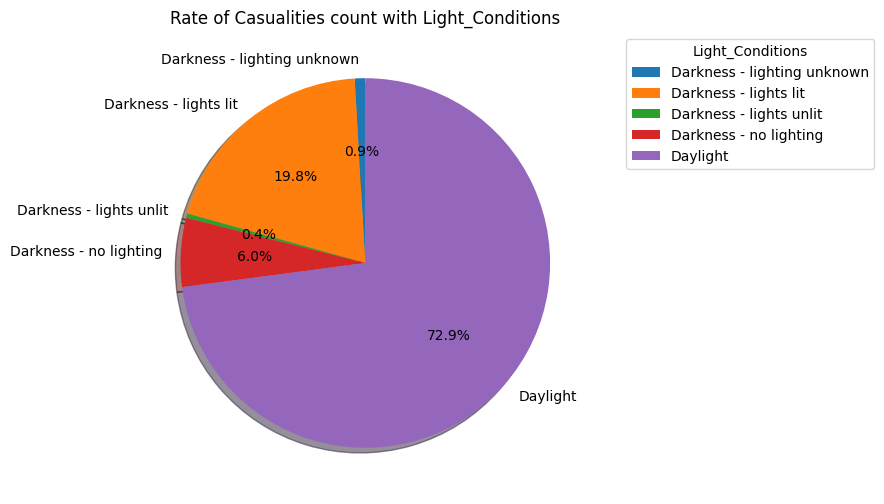

In [27]:
plt.figure(figsize=(15, 6))
plt.pie(Light_Conditions_Casualities.values, labels=Light_Conditions_Casualities.index, 
        autopct='%1.1f%%',  
        shadow=True, startangle=90)
plt.title('Rate of Casualities count with Light_Conditions')
plt.legend(title='Light_Conditions', bbox_to_anchor=(1.05, 1), loc=2)

plt.show()

- More that 70% of accidents was happened in Day lights
- Around 20% of accidents was happened in Darkness with light lit
- 6% of accidents happened in no lighting darkness

In [28]:
#8. What is the relationship between Road_Surface_Conditions and Casualities count?
Road_Surface_Conditions_Casualities = file.groupby(['Road_Surface_Conditions'])['Number_of_Casualties'].sum()
Road_Surface_Conditions_Casualities

Road_Surface_Conditions
Dry                     269984
Flood over 3cm. deep       529
Frost or ice             15780
Other                      391
Snow                      6260
Wet or damp             110243
Name: Number_of_Casualties, dtype: int64

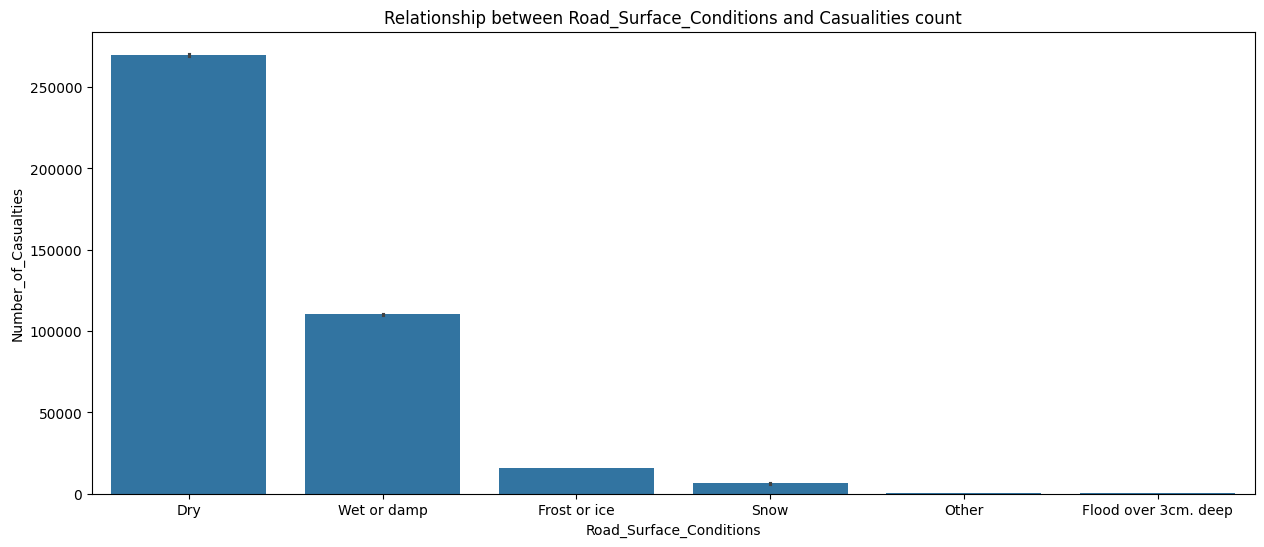

In [29]:
plt.figure(figsize=(15, 6))
sns.barplot(x='Road_Surface_Conditions', y='Number_of_Casualties', data=file,estimator="sum")
plt.title('Relationship between Road_Surface_Conditions and Casualities count')
plt.xlabel('Road_Surface_Conditions')
plt.ylabel('Number_of_Casualties')
plt.show()

- Around 2.7laks casualities were happened in Dry Road condition
- Wet or Damp is the second high causualities condition
- All other conditions are comparatively low

In [30]:
#9. Does the speed limit affect the casualities counts?
Speed_limit_Casualities = file.groupby(['Speed_limit'])['Number_of_Casualties'].sum()
Speed_limit_Casualities

Speed_limit
10         4
15         3
20      3403
30    250521
40     35587
50     14419
60     68615
70     30635
Name: Number_of_Casualties, dtype: int64

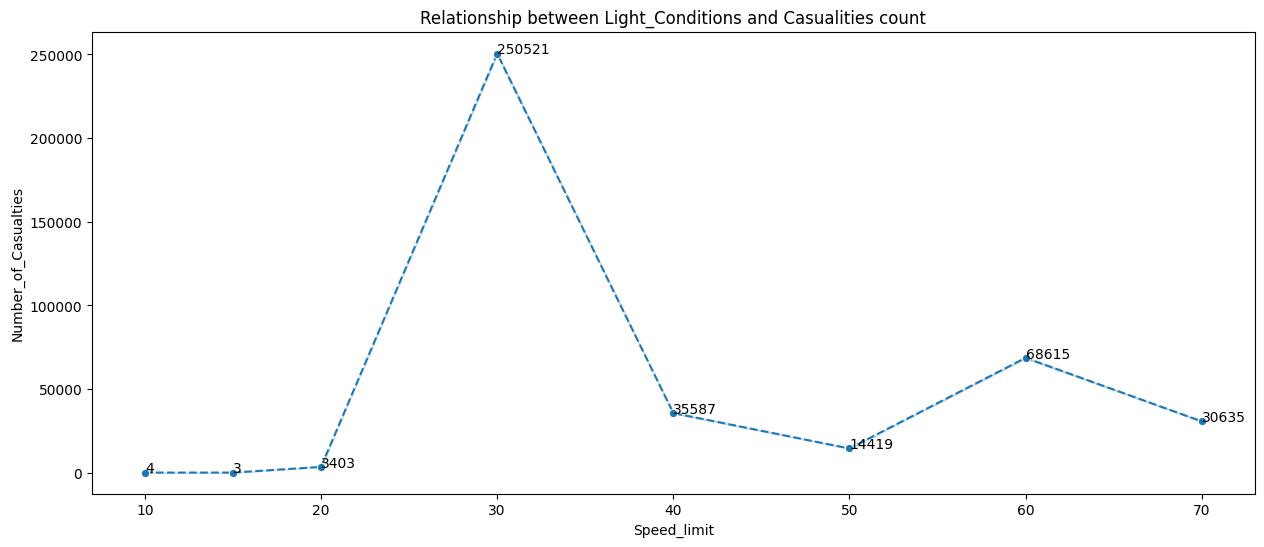

In [31]:
plt.figure(figsize=(15, 6))
sns.lineplot(x='Speed_limit', y='Number_of_Casualties', data=file,estimator="sum",marker='o', linestyle='--')
plt.title('Relationship between Light_Conditions and Casualities count')
plt.xlabel('Speed_limit')
plt.ylabel('Number_of_Casualties')
for x,y in zip(Speed_limit_Casualities.index,Speed_limit_Casualities.values):
    plt.annotate(y,xy=(x,y),xytext=(x,y))
plt.show()

- We can see that around 2.5laks of Causalities happened in the 30km speed limit roads where most of the public used for transporations

In [32]:
#10. Which Vehicle_Type has high accidents counts?
Vehicle_Type_Casualities = file.groupby(['Vehicle_Type'])['Number_of_Casualties'].size()
Vehicle_Type_Casualities.sort_values()

Vehicle_Type
Ridden horse                                  3
Pedal cycle                                  64
Agricultural vehicle                        733
Minibus (8 - 16 passenger seats)            805
Goods over 3.5t. and under 7.5t            2442
Other vehicle                              2463
Motorcycle over 125cc and up to 500cc      3209
Motorcycle 50cc and under                  3607
Taxi/Private hire car                      5397
Goods 7.5 tonnes mgw and over              6374
Motorcycle 125cc and under                 6720
Bus or coach (17 or more pass seats)       8509
Motorcycle over 500cc                     11004
Van / Goods 3.5 tonnes mgw or under       15371
Car                                      234452
Name: Number_of_Casualties, dtype: int64

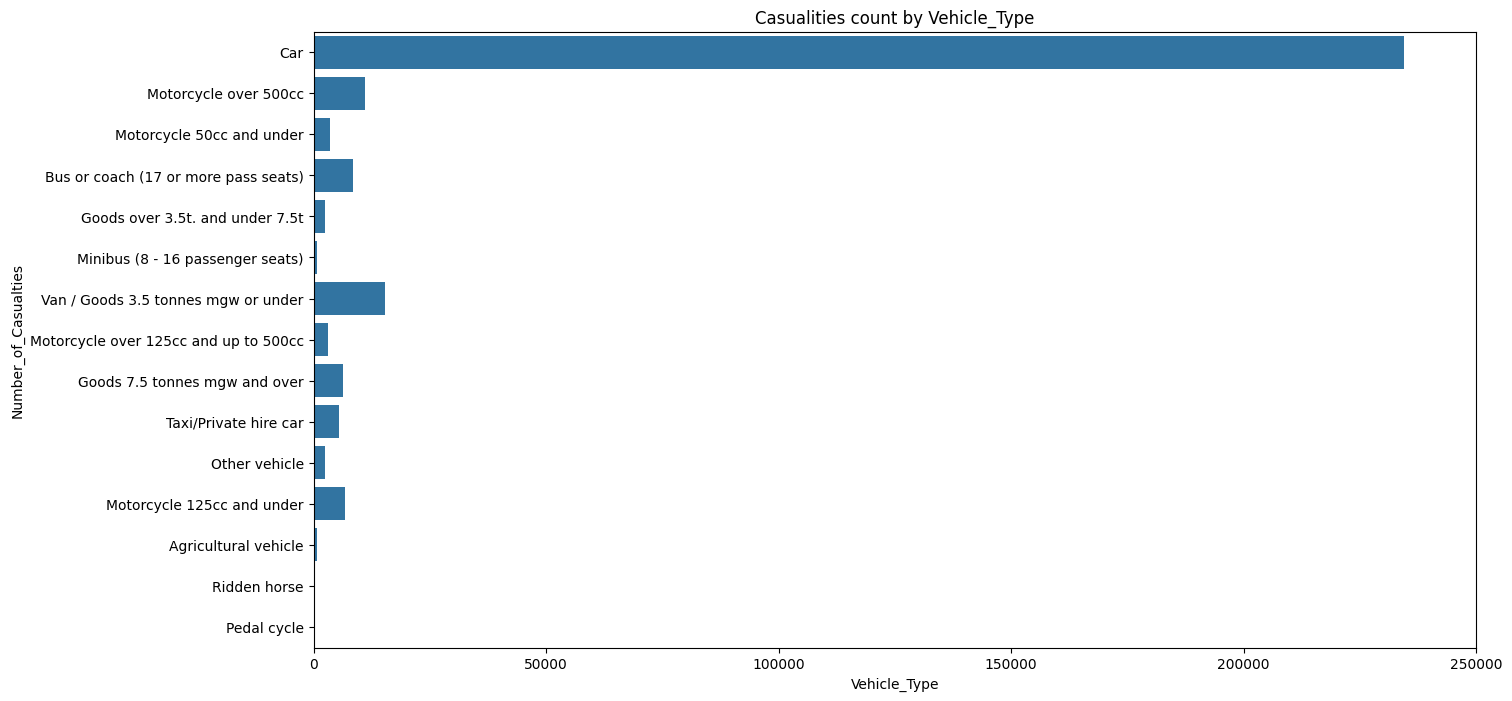

In [33]:
plt.figure(figsize=(15, 8))
sns.barplot(y='Vehicle_Type', x='Number_of_Casualties', data=file,estimator="size",orient='h')
plt.title('Casualities count by Vehicle_Type')
plt.xlabel('Vehicle_Type')
plt.xlim(0,250000)
plt.ylabel('Number_of_Casualties')
plt.show()

- Around 2.3 lakhs of accidents was happened with cars which the people mostly use to transport with multiple passengers and with goods.

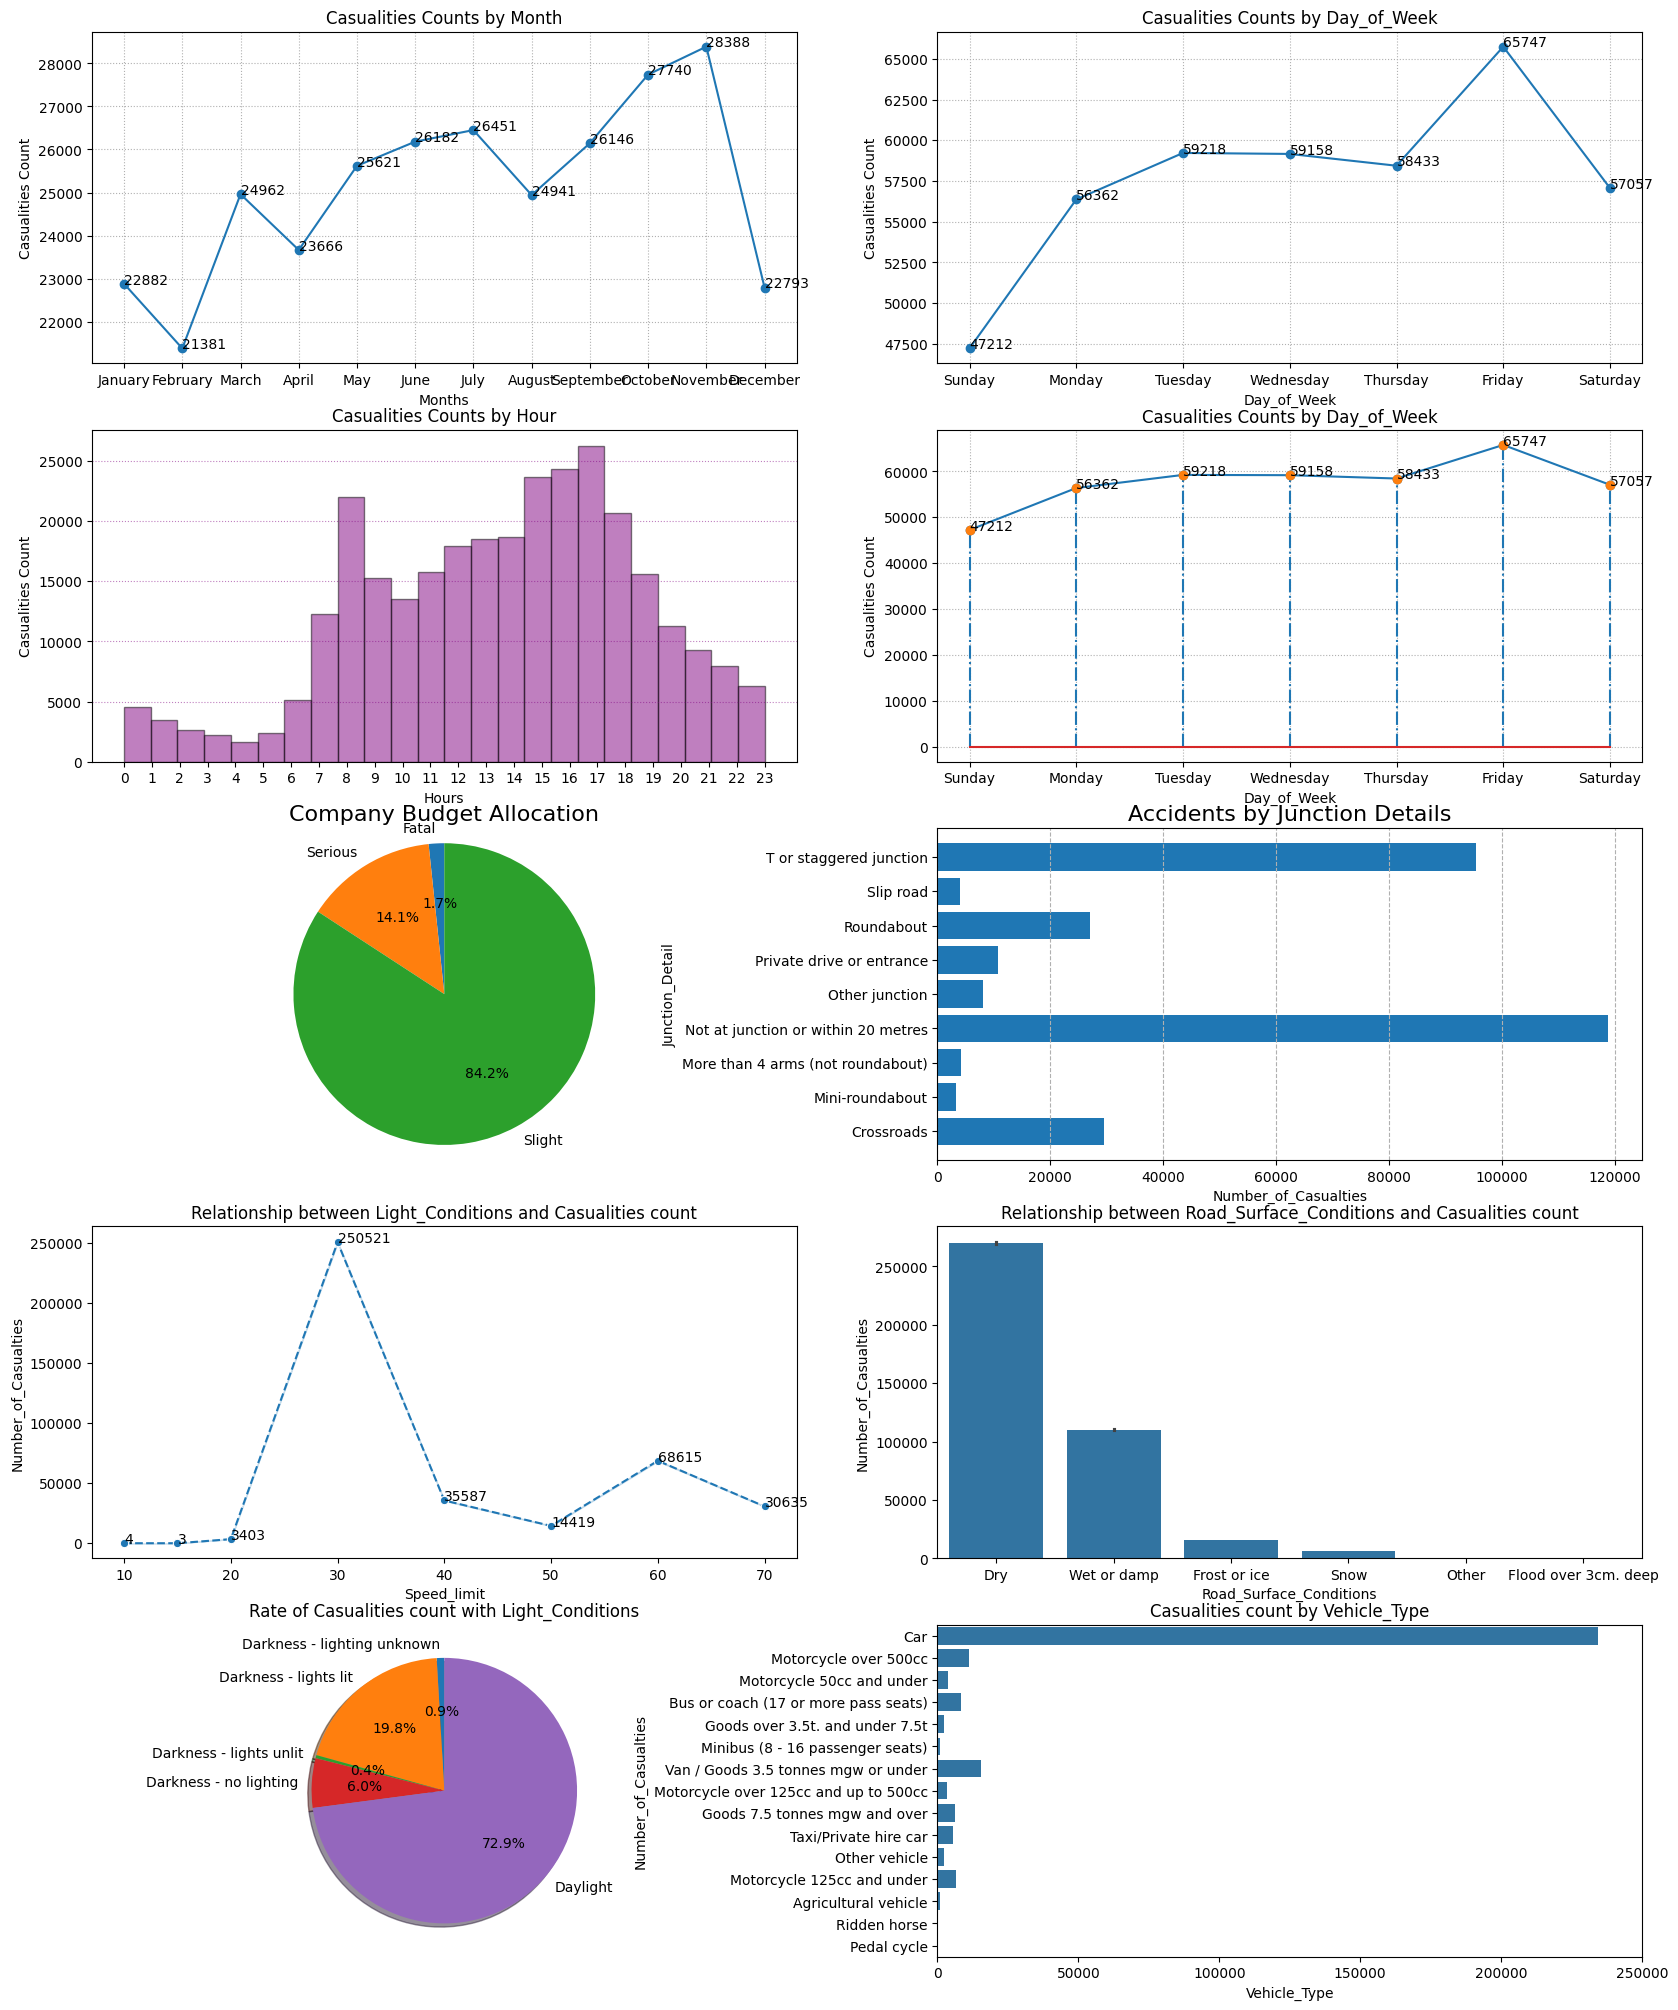

In [34]:
plt.figure(figsize=(20,25))
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 



plt.subplot(5,2,1)

plt.title("Casualities Counts by Month")
plt.plot(casuality_month.index,casuality_month.values, marker='o')
plt.xlabel("Months")
plt.ylabel("Casualities Count")
plt.grid(linestyle=":")
for x,y in zip(casuality_month.index,casuality_month.values):
    plt.annotate(y,xy=(x,y),xytext=(x,y))



plt.subplot(5,2,2)

plt.title("Casualities Counts by Day_of_Week")
plt.plot(casuality_Day.index,casuality_Day.values, marker='o')
plt.xlabel("Day_of_Week")
plt.ylabel("Casualities Count")
plt.grid(linestyle=":")
for x,y in zip(casuality_Day.index,casuality_Day.values):
    plt.annotate(y,xy=(x,y),xytext=(x,y))



plt.subplot(5,2,3)

plt.title("Casualities Counts by Hour")
plt.hist(file['AccidentHour'], bins=24, color='purple', edgecolor='black', alpha=0.5)
plt.xticks(list(x for x in range(0,24)))
plt.xlabel("Hours")
plt.ylabel("Casualities Count")
plt.grid(axis='y',color='purple',linestyle=":",alpha=0.5)



plt.subplot(5,2,4)

plt.title("Casualities Counts by Day_of_Week")
plt.plot(casuality_Day.index,casuality_Day.values, marker='o')
plt.stem(casuality_Day.index,casuality_Day.values,linefmt='-.', markerfmt='o')
plt.xlabel("Day_of_Week")
plt.ylabel("Casualities Count")
plt.grid(linestyle=":")
for x,y in zip(casuality_Day.index,casuality_Day.values):
    plt.annotate(y,xy=(x,y),xytext=(x,y))


    
plt.subplot(5,2,5)

plt.pie(Casualties_Accident_Severity.values, labels=Casualties_Accident_Severity.index, autopct='%1.1f%%', startangle=90)
plt.title('Company Budget Allocation', fontsize=16)
plt.axis('equal')



plt.subplot(5,2,6)

plt.barh(Junction_Detail_Accidents.index, Junction_Detail_Accidents.values)
plt.title('Accidents by Junction Details', fontsize=16)
plt.ylabel('Junction_Detail')
plt.xlabel('Number_of_Casualties')
plt.grid(axis='x', linestyle='--')



plt.subplot(5,2,7)

sns.lineplot(x='Speed_limit', y='Number_of_Casualties', data=file,estimator="sum",marker='o', linestyle='--')
plt.title('Relationship between Light_Conditions and Casualities count')
plt.xlabel('Speed_limit')
plt.ylabel('Number_of_Casualties')
for x,y in zip(Speed_limit_Casualities.index,Speed_limit_Casualities.values):
    plt.annotate(y,xy=(x,y),xytext=(x,y))



plt.subplot(5,2,8)

sns.barplot(x='Road_Surface_Conditions', y='Number_of_Casualties', data=file,estimator="sum")
plt.title('Relationship between Road_Surface_Conditions and Casualities count')
plt.xlabel('Road_Surface_Conditions')
plt.ylabel('Number_of_Casualties')



plt.subplot(5,2,9)

plt.pie(Light_Conditions_Casualities.values, labels=Light_Conditions_Casualities.index, 
        autopct='%1.1f%%',  
        shadow=True, startangle=90)
plt.title('Rate of Casualities count with Light_Conditions')



plt.subplot(5,2,10)

sns.barplot(y='Vehicle_Type', x='Number_of_Casualties', data=file,estimator="size",orient='h')
plt.title('Casualities count by Vehicle_Type')
plt.xlabel('Vehicle_Type')
plt.xlim(0,250000)
plt.ylabel('Number_of_Casualties')



plt.show()